In [1]:
import pandas as pd

def load_workouts(path):
    return pd.read_csv(path)

def weekly_metrics(df):
    return df.describe()

In [2]:
import sys
sys.path.append("../src")

from workout_insights.core import load_workouts, weekly_metrics

df = load_workouts("../data/raw/example_workouts_and_planner.csv")
print(df.head())

metrics = weekly_metrics(df)
print(metrics)

        date        exercise  sets  reps  weight_kg muscle_group
0 2025-09-02  Overhead Press     4     8       54.7    shoulders
1 2025-09-02    Barbell Curl     3     6       30.4       biceps
2 2025-09-03   Lateral Raise     5    10       49.9    shoulders
3 2025-09-03    Barbell Curl     4     9       37.7       biceps
4 2025-09-04   Lateral Raise     4     8       52.3    shoulders
    week muscle_group  sessions  total_volume  avg_intensity
0     36         back         2        5612.4      80.700000
1     36       biceps         1        1904.4      34.050000
2     36    shoulders         2        7099.8      51.525000
3     36      triceps         1        2170.0      43.400000
4     37         back         1        5100.6      89.350000
5     37    shoulders         2        5607.2      48.833333
6     38         back         2        8073.0      80.833333
7     38       biceps         1        3247.8      35.733333
8     38        chest         1        3073.5      68.300000


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path

rng = np.random.default_rng(42)

# parâmetros
start = pd.Timestamp("2025-09-01")
weeks = 8
days = weeks * 7

exercises = [
    ("Barbell Bench Press", "chest"),
    ("Incline DB Press", "chest"),
    ("Back Squat", "legs"),
    ("Romanian Deadlift", "hamstrings"),
    ("Lat Pulldown", "back"),
    ("Barbell Row", "back"),
    ("Overhead Press", "shoulders"),
    ("Lateral Raise", "shoulders"),
    ("Barbell Curl", "biceps"),
    ("Triceps Pushdown", "triceps"),
]

rows = []
for d in range(days):
    date = start + pd.Timedelta(days=int(d))
    # 0–2 exercícios por dia
    for _ in range(rng.integers(0, 3)):
        ex, mg = exercises[rng.integers(len(exercises))]
        sets = int(rng.integers(3, 6))
        reps = int(rng.integers(6, 12))
        # pesos base aproximados por grupo com ruído
        base = {
            "chest": 80, "legs": 120, "hamstrings": 90, "back": 85,
            "shoulders": 50, "biceps": 35, "triceps": 45
        }.get(mg, 60)
        weight = float(max(10, rng.normal(base, base*0.1)))
        rows.append([date, ex, sets, reps, round(weight, 1), mg])

df = pd.DataFrame(rows, columns=["date","exercise","sets","reps","weight_kg","muscle_group"])

# garantir pastas e salvar
out_path = Path("../data/raw/example_workouts_and_planner.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(out_path, index=False)

df.head()


,date,exercise,sets,reps,weight_kg,muscle_group
0,2025-09-02,Overhead Press,4,8,54.7,shoulders
1,2025-09-02,Barbell Curl,3,6,30.4,biceps
2,2025-09-03,Lateral Raise,5,10,49.9,shoulders
3,2025-09-03,Barbell Curl,4,9,37.7,biceps
4,2025-09-04,Lateral Raise,4,8,52.3,shoulders


In [4]:
import pandas as pd

class WorkoutConfig:
    """
    Configurações para análise de treino.
    """
    def __init__(self, min_sessions=3, plateau_threshold=0.05):
        self.min_sessions = min_sessions
        self.plateau_threshold = plateau_threshold

def load_workouts(path):
    """Carrega os dados de treino a partir de um arquivo CSV."""
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"Erro ao carregar o arquivo: {e}")
        return pd.DataFrame()

def weekly_metrics(df):
    """Calcula estatísticas descritivas básicas."""
    if df.empty:
        print("DataFrame vazio. Nenhuma métrica calculada.")
        return None
    return df.describe()

def detect_plateau(df, config):
    """
    Detecta se há estagnação no progresso com base na duração média dos treinos.
    """
    if df.empty or 'duração' not in df.columns:
        return False

    weekly_avg = df.groupby('semana')['duração'].mean()
    if len(weekly_avg) < config.min_sessions:
        return False

    recent = weekly_avg[-config.min_sessions:]
    variation = recent.max() - recent.min()
    return variation < config.plateau_threshold

def recommend_progression(df, config):
    """
    Recomenda ajustes no treino se houver estagnação.
    """
    if detect_plateau(df, config):
        return "Recomenda-se aumentar a intensidade ou variar os exercícios."
    return "Progresso dentro do esperado. Continue com o plano atual."

In [5]:
import sys
sys.path.append("../src")

from workout_insights.core import load_workouts, weekly_metrics, WorkoutConfig, detect_plateau, recommend_progression

df = load_workouts("../data/raw/example_workouts_and_planner.csv")
weekly = weekly_metrics(df)

cfg = WorkoutConfig(min_sessions_per_week=2, plateau_weeks=3, progressive_step_pct=2.5)
weekly = detect_plateau(weekly, cfg)
recs = recommend_progression(weekly, cfg)

weekly.head(), recs.head()


(    week muscle_group  sessions  total_volume  avg_intensity  plateau
 0     36         back         2        5612.4      80.700000    False
 4     37         back         1        5100.6      89.350000    False
 6     38         back         2        8073.0      80.833333    False
 12    39         back         2        7398.5      82.150000    False
 15    40         back         1       10594.1      81.150000    False,
    week muscle_group                      suggestion
 0    36         back              Manter plano atual
 1    37         back  Adicionar 1 sessão esta semana
 2    38         back              Manter plano atual
 3    39         back              Manter plano atual
 4    40         back  Adicionar 1 sessão esta semana)

In [6]:
weekly.to_csv("../docs/weekly_metrics.csv", index=False)
recs.to_csv("../docs/recommendations.csv", index=False)


In [9]:
# eda
# Gera gráficos simples (distribuições e séries por semana) e salva imagens/CSVs em docs/ para documentar a análise exploratória de forma rastreável no repo.​
# Exemplo de células:

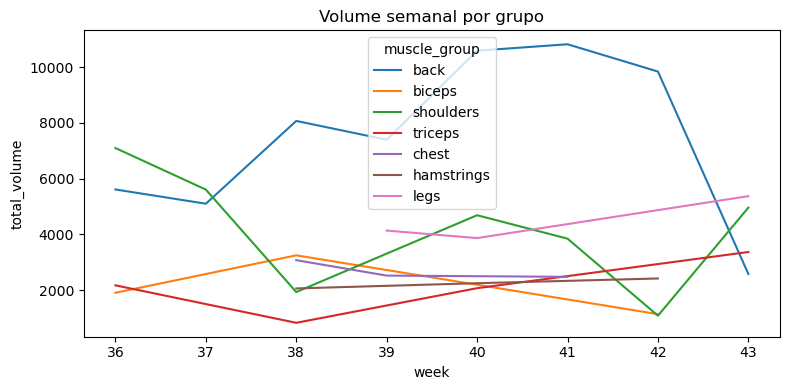

In [8]:
import seaborn as sns, matplotlib.pyplot as plt
weekly = weekly_metrics(df)
plt.figure(figsize=(8,4)); sns.lineplot(data=weekly, x="week", y="total_volume", hue="muscle_group"); plt.title("Volume semanal por grupo"); plt.tight_layout(); plt.savefig("../docs/eda_volume_semanais.png", dpi=120)
weekly.to_csv("../docs/weekly_metrics.csv", index=False)

In [10]:
# model (platôs e recomendações)
# Calcula platôs e produz recomendações explicáveis, mantendo a lógica no pacote e o notebook como camada de relato para apoiar reuso e testes.
# Células principais:

In [11]:
from workout_insights.core import WorkoutConfig, detect_plateau, recommend_progression
cfg = WorkoutConfig(min_sessions_per_week=2, plateau_weeks=3, progressive_step_pct=2.5)
weekly = detect_plateau(weekly, cfg)
recs = recommend_progression(weekly, cfg)
recs.to_csv("../docs/recommendations.csv", index=False)
recs.head()


,week,muscle_group,suggestion
0,36,back,Manter plano atual
1,37,back,Adicionar 1 sessão esta semana
2,38,back,Manter plano atual
3,39,back,Manter plano atual
4,40,back,Adicionar 1 sessão esta semana


In [12]:
# report (artefatos prontos)
# Monta um relatório curto: 2–3 figuras, tabela de recomendações e links para os CSVs em docs/, pronto para ser visto por quem chega ao repo.
# Exporta gráficos e tabelas para docs/ e insere prints no README para a secção “Demo”, o que aumenta a atratividade do projeto.

In [13]:
git add notebooks docs/*.csv docs/*.png README.md
git commit -m "feat: EDA, platôs e recomendações + artefatos em docs"
git tag v0.1.0 && git push && git push --tags


SyntaxError: invalid syntax (2421129110.py, line 1)